In [1]:
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import scipy.integrate #Integration library
from mpl_toolkits.mplot3d import axes3d #Used for the 3d bifurcation plot
import matplotlib.patches as mpatches #used to write custom legends
from scipy.special import binom
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import sympy as sym
import math as m

from matplotlib import animation, rc
#import matplotlib.animation as animation
#%matplotlib notebook
#%matplotlib inline
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import os
import scipy.integrate as integrate
from sympy.abc import x, y, S
from multiprocessing import Pool
from datetime import datetime

%matplotlib inline

In [2]:
import sympy as sym
import math as m

from matplotlib import animation, rc
#import matplotlib.animation as animation
#%matplotlib notebook
#%matplotlib inline
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import os
import scipy.integrate as integrate
from sympy.abc import x, y, S
from multiprocessing import Pool
from datetime import datetime

%matplotlib inline

Useful functions

In [3]:
def gauss(s):
    return(1/m.sqrt(m.pi)*m.exp(-s**2))

def cut_compact(x):
    if abs(x)<=0.5:
        return(3./4-x**2)
    else:
        if 0.5<abs(x)<=1.5:
            return(0.5*(1.5-abs(x))**2)
        else:
            return(0)

Advection function

In [4]:
def pos(x,L): #identifie the index of the posisition of x in the ordonned list L

    if x>=L[-1]:
        return(len(L))
    else:
        i=0
        while x>=L[i]:
            i=i+1
        return(i)
    
def affine_by_part(L_root, L_slope, m, M):              # return the function with roots L_root, with slope L_slope at each of these roots 
                                                        # and bounded by (m,M)
    L_change=[(L_slope[i]*L_root[i]-L_slope[i+1]*L_root[i+1])/(L_slope[i]-L_slope[i+1]) for i in range(len(L_root)-1)]
    def func_(x):
        return(L_slope[pos(x, L_change)]*(x-L_root[pos(x, L_change)]))
            
    def func(x):
        return(min(M, max(func_(x), m)))
    return(func)



def affine_by_part_der(L_root, L_slope, m, M):              # return the function with roots L_root, with slope L_slope at each of these roots 
                                                        # and bounded by (m,M)
    L_change=[(L_slope[i]*L_root[i]-L_slope[i+1]*L_root[i+1])/(L_slope[i]-L_slope[i+1]) for i in range(len(L_root)-1)]
    def func(x):
        return(L_slope[pos(x, L_change)])
    return(func)




I_stable_left=np.array([150000.0, 208817.63527054107])
I_stable_center=np.array([193286.5731462926, 224649.2985971944])
I_stable_right=np.array([185270.54108216433, 250000.0])

I_unstable_short=np.array([193286.5731462926, 208817.63527054107])
I_unstable_long=np.array([185270.54108216433, 224649.2985971944])

x_stable_left_coef=np.array([-1.98068372e-20,  1.72778767e-14, -6.01655669e-09,  1.04558220e-03,
 -9.08181301e+01,  3.18506176e+06])
x_stable_center_coef=np.array([-9.97960480e-19,  1.04447036e-12, -4.37203191e-07,  9.14932022e-02,
 -9.57246289e+03,  4.00596473e+08])
x_stable_right_coef=np.array([-6.10906482e-21,  6.84633959e-15, -3.06591965e-09,  6.85909353e-04,
 -7.66847769e+01,  3.43040294e+06])
x_unstable_short_coef=np.array([ 1.98171027e-17, -1.99617838e-11,  8.04269750e-06, -1.62015993e+00,
  1.63180639e+05, -6.57391347e+09])
x_unstable_long_coef=np.array([ 2.50429596e-19, -2.55194809e-13,  1.03983466e-07, -2.11771508e-02,
  2.15571288e+03, -8.77460219e+07])

def x_stable_left(S):
    return(np.dot(x_stable_left_coef, np.array([S**5, S**4, S**3, S**2, S, 1])))
def x_stable_center(S):
    return(np.dot(x_stable_center_coef, np.array([S**5, S**4, S**3, S**2, S, 1])))
def x_stable_right(S):
    return(np.dot(x_stable_right_coef, np.array([S**5, S**4, S**3, S**2, S, 1])))
def x_unstable_short(S):
    return(np.dot(x_unstable_short_coef, np.array([S**5, S**4, S**3, S**2, S, 1])))
def x_unstable_long(S):
    return(np.dot(x_unstable_long_coef, np.array([S**5, S**4, S**3, S**2, S, 1])))

def f(x,S):
    #C1, C2, C3, C4, C5=p[0], p[1], p[2], p[3], p[4]
    
    C=0.02
    
    C1=C
    C2=C
    C3=C
    C4=C
    C5=C
    M=10**10
    m=-10**10
    
    if S<=I_stable_right[0]:
        return(min(M, max(-C1*(x-x_stable_left(S)), m)))
        
    if I_stable_right[0]<S<=I_stable_center[0]:
        L_slope=[-C5,C4, -C1]
        L_root=[x_stable_right(S), x_unstable_long(S), x_stable_left(S)]
        #print(L_root)
        return(affine_by_part(L_root, L_slope, m, M)(x))
    
    if I_stable_center[0]<S<=I_stable_left[-1]:
        L_slope=[-C5, C4, -C3, C2, -C1]
        L_root=[ x_stable_right(S),x_unstable_long(S), x_stable_center(S), x_unstable_short(S), x_stable_left(S)]
        return(affine_by_part(L_root, L_slope, m, M)(x))
    
    if I_stable_left[-1]<S<=I_stable_center[-1]:
        L_slope=[-C5,C4, -C3]
        L_root=[x_stable_right(S), x_unstable_long(S), x_stable_center(S)]
        return(affine_by_part(L_root, L_slope, m, M)(x))
    
    if S>I_stable_center[-1]:
        return(min(M, max(-C5*(x-x_stable_right(S)), m)))

def f_prime(x,S):

    #C1, C2, C3, C4, C5=p[0], p[1], p[2], p[3], p[4]
     
    C=0.02
    
    C1=C
    C2=C
    C3=C
    C4=C
    C5=C
    M=10**10
    m=-10**10
    
    if S<=I_stable_right[0]:
        return(-C1)
        
    if I_stable_right[0]<S<=I_stable_center[0]:
        L_slope=[-C5,C4, -C1]
        L_root=[x_stable_right(S), x_unstable_long(S), x_stable_left(S)]
        #print(L_root)
        return(affine_by_part_der(L_root, L_slope, m, M)(x))
    
    if I_stable_center[0]<S<=I_stable_left[-1]:
        L_slope=[-C5, C4, -C3, C2, -C1]
        L_root=[ x_stable_right(S),x_unstable_long(S), x_stable_center(S), x_unstable_short(S), x_stable_left(S)]
        return(affine_by_part_der(L_root, L_slope, m, M)(x))
    
    if I_stable_left[-1]<S<=I_stable_center[-1]:
        L_slope=[-C5,C4, -C3]
        L_root=[x_stable_right(S), x_unstable_long(S), x_stable_center(S)]
        return(affine_by_part_der(L_root, L_slope, m, M)(x))
    
    if S>I_stable_center[-1]:
        return(-C5)


In [5]:
#Compute the solution for an initial condition in [0,1]^2


def approx_adv_S(functions, x0, S0, Lt, cut_off, eps_x, eps_S): 

    a, a_prime, a_S, a_S_prime, r, d, M, n0=functions[0], functions[1], functions[2], functions[3], functions[4], functions[5], functions[6], functions[7]


    Nx=len(x0)
    NS=len(S0)
    h=(x0[-1]-x0[0])/(Nx)
    h_S=(S0[-1]-S0[0])/(NS)
    x0_=np.array([y for y in x0 for s in S0])
    S0_=np.array([s for y in x0 for s in S0])
    delta=Lt[0]
    
    w0=np.array([h*h_S for i in range(Nx*NS)])      
    v0=np.array([h*h_S*n0(x0_[i], S0_[i]) for i in  range(Nx*NS)])
    X0=np.concatenate((x0_, S0_, w0, v0))
    
    L_fin_1=[]
    L_fin_2=[]

    def F(t,Y):
        X=Y[0:Nx*NS]
        S=Y[Nx*NS:2*Nx*NS]
        W=Y[2*Nx*NS:3*Nx*NS]
        V=Y[3*Nx*NS:4*Nx*NS]
        
        F_1=np.array([a(X[i], S[i]) for i in range(Nx*NS)])
        F_2=np.array([a_S(S[i]) for i in range(Nx*NS)])
        F_3=np.array([a_prime(X[i], S[i])+a_S_prime(S[i]) for i in range(Nx*NS)])*W
        aux1=np.array([[M(X[i], S[i], X[j], S[j])*V[j] for j in range(Nx*NS)] for i in range(Nx*NS)])
        aux2=np.array([[M(X[j], S[j], X[i], S[i])*W[j] for j in range(Nx*NS)] for i in range(Nx*NS)])
        F_4=np.array([(r(X[i], S[i])-d(X[i], S[i])*np.sum(V)-np.sum(aux2[i]))*V[i]+W[i]*np.sum(aux1[i]) for i in range(Nx*NS)])
        return(np.concatenate((F_1, F_2, F_3, F_4)))
        
    def ker(s,s_):
        return(1./(eps_x*eps_S)*cut_off(s/eps_x)*cut_off(s_/eps_S))
    
    for i in range(len(Lt)):
        sol=solve_ivp(F, (0, delta), X0, t_eval=[delta]).y
        sol_x=sol[0:Nx*NS]
        sol_S=sol[Nx*NS:2*Nx*NS]
        sol_v=sol[3*NS*Nx:4*NS*Nx]
        
        SUM=np.array([np.sum(np.array([sol_v[k][0]*ker(x0_[i]-sol_x[k][0],S0_[i]-sol_S[k][0])  for k in range(Nx*NS)])) for i in range(Nx*NS)])
        SUM_=np.array([np.sum(SUM[i*NS:(i+1)*NS]) for i in range(Nx)])*h_S
        L_fin_1.append(SUM)
        L_fin_2.append(SUM_)
        v0=SUM*w0

        X0=np.concatenate((x0_, S0_, w0, v0))
        
        if i<len(Lt)-1:
            delta=Lt[i+1]-Lt[i]
            
    return(np.array(L_fin_1), np.array(L_fin_2))

#Compute the solution for an initial condition in any domain


def approx_adv_S_re(functions, x0, S0, Lt, cut_off, eps_x, eps_S): 
    a, a_prime, a_S, a_S_prime, r, d, M, n0= functions[0], functions[1], functions[2], functions[3], functions[4], functions[5], functions[6], functions[7]
    
    
    A=x0[-1]-x0[0]
    B=x0[0]
    C=S0[-1]-S0[0]
    D=S0[0]
    
    def a_re(x, S):
        return((1./A)*a(A*x+B, C*S+D))

    def a_prime_re(x, S):
        return(a_prime(A*x+B, C*S+D))
    
    def a_S_re(S):
        return(1./C*a_S(C*S+D))
    
    def a_S_prime_re(S):
        return(a_S_prime(C*S+D))
    
    def r_re(x, S):
        return(r(A*x+B, C*S+D))
    
    def d_re(x, S): 
        return(d(A*x+B, C*S+D))
    
    def M_re(x, S, y, S_):
        return(A*C*M(A*x+B, C*S+D, A*y+B, C*S_+D))
    
    def n0_re(x, S):
        return(A*C*n0(A*x+B, C*S+D))
    
    functions_re=[a_re, a_prime_re, a_S_re, a_S_prime_re, r_re, d_re, M_re, n0_re]
    
    Nx=len(x0)
    NS=len(S0)
    
    x0_re=np.linspace(0, 1, Nx)
    S0_re=np.linspace(0, 1, NS)
    
    U_S, U=approx_adv_S(functions_re, x0_re, S0_re, Lt, cut_off, eps_x, eps_S)
    return(1./(A*C)*U_S, 1./(A)*U)

Changeable parameters

In [6]:
Nx=20
NS=20

x0=np.linspace(0.0*1000, 25*1000, Nx)
S0=np.linspace(150*1000, 250*1000, NS)

hx=(x0[-1]-x0[0])/(Nx)
hS=(S0[-1]-S0[0])/(NS)


r0=0.0182
#Growth term

"""
def r(x,S):
    return(0.0182)

def r_heterogeneous(x,S,p, q): 
    if x>=16*1000:
        return(r0)
    
    if 4*1000<x<16*1000:
        return(r0/p)
        
    if x<=4*1000:
        return(r0/q)
"""

carrying_capacity=10*1000
#Death term
def d(x,S): 
    return(r0*1./carrying_capacity)
#    return(0)


#eta=5*1000
#eta=10*1000
#eta=20*1000
#eta=30*1000
#eta=40*1000

#tau=1.

#def M(x,S,y,S_):
    
#    return(1./tau*1./eta*1./(x0[-1]-x0[0])*gauss((S-S_)/eta)*r(x,S))


#tau_ep, tau_mes=1, tau_hyb=2, 5, 10
           
def tau_heterogeneous(x, tau_ep, tau_hyb, tau_mes):
           
    if x>=16*1000:
        return(tau_ep)
    
    if 4*1000<x<16*1000:
        return(tau_hyb)
        
    if x<=4*1000:
        return(tau_mes)

    
coeff_poly_tau=np.polyfit([1*1000, 12.5*1000, 25*1000], [2,1,5],2)
def tau_polynomial(x):
#P(x=1)=2
#P(x=12.5)=1
#P(x=25)=5
    return(np.dot([x**2, x, 1], coeff_poly_tau))

#plt.plot(x0, [tau_polynomial(x) for x in x0])
#plt.show()

#Initial population size
init_size=100

#Initial epithelial population

def n0_ep(x,S):
    if (150*1000<=S<=208817.63527054107) and (16*1000<=x<=25*1000):
        return(init_size/((208817.63527054107-150*1000)*(25*1000-16*1000)))
    else:
        return(0)

#Initial hybrid population

def n0_hyb(x,S):
    
    if (193286.5731462926<=S<=224649.2985971944) and (4*1000<=x<=16*1000):
        return(init_size/((224649.2985971944-193286.5731462926)*(16*1000-4*1000)))
    else:
        return(0)
    
#Initial mesenchymal population

def n0_mes(x, S):
    if (185270.54108216433<=S<=250*1000) and (0<=x<=4*1000):
        return(init_size/((250*1000-185270.54108216433)*(4*1000)))
    
    else:
        return(0)

def n0_epi_mes(x, S):

    if (150*1000<=S<=208817.63527054107) and (16*1000<=x<=25*1000):
        return(init_size/(2*(208817.63527054107-150*1000)*(25*1000-16*1000)))
    elif (185270.54108216433<=S<=250*1000) and (0<=x<=4*1000):
        return(init_size/(2*(250*1000-185270.54108216433)*(4*1000)))
    else:
        return(0)
    
def n0_epi_hyb_mes(x, S):

    if (150*1000<=S<=208817.63527054107) and (16*1000<=x<=25*1000):
        return(init_size/(3*(208817.63527054107-150*1000)*(25*1000-16*1000)))
    elif (193286.5731462926<=S<=224649.2985971944) and (4*1000<=x<=16*1000):
        return(init_size/(3*(224649.2985971944-193286.5731462926)*(16*1000-4*1000)))
    elif (185270.54108216433<=S<=250*1000) and (0<=x<=4*1000):
        return(init_size/(3*(250*1000-185270.54108216433)*(4*1000)))
    else:
        return(0)
    
def n0_uniform(x, S):
    return(init_size/((250*1000)*(25*1000)))

#functions=[f, f_prime, r, d, M, n0_ep] 

#Times where the solution is computed 
Lt=[5*24, 10*24, 15*24, 20*24, 25*24, 30*24, 35*24, 40*24, 45*24, 50*24, 55*24, 60*24, 65*24, 70*24, 75*24, 80*24, 85*24, 90*24, 95*24, 100*24] 
#Lt=[5*24, 10*24] 

"""

def M(x,S,y,S_):
    eta_x=4000
    eta=15*1000
    tau=1
    return(1./tau*1./eta_x*1./eta*gauss((S-S_)/eta)*gauss((x-y)/eta_x)*r(x,S))

"""

'\n\ndef M(x,S,y,S_):\n    eta_x=4000\n    eta=15*1000\n    tau=1\n    return(1./tau*1./eta_x*1./eta*gauss((S-S_)/eta)*gauss((x-y)/eta_x)*r(x,S))\n\n'

Compute the solution

In [7]:
eps_x=(1./Nx)**0.8
eps_S=(1./NS)**0.8

In [8]:
"""
def delta_parallel(delta_S):
    S_lim=160*1000
    def a_S(S):
        return(delta_S*(1-S/S_lim))
    
    def a_S_prime(S):
        return(-delta_S/S_lim)

    functions=[f, f_prime, a_S, a_S_prime, r, d, M, n0_mes]
    
    US, U=approx_adv_S_re(functions, x0, S0, Lt, gauss, eps_x , eps_S)
    US_reshaped=US.reshape(US.shape[0], -1) 
    op=open('Advection_S/n0_mes/S_lim=160K/2D/delta=%s'%(delta_S), 'w+')
    np.savetxt('Advection_S/n0_mes/S_lim=160K/2D/delta=%s'%(delta_S), US_reshaped)
    return(US)

"""

def para_set_parallel_sim(para_set):

    S_lim = para_set[0]
    alpha = para_set[1]
    eta= para_set[2]
    eta_x=para_set[3]
    tau = para_set[4]
    r_het_p = para_set[5]
    r_het_q = para_set[6]
    init_pop_indx = int(para_set[7])

    delta_S = S_lim * np.log(2)/ alpha
    
    def M(x,S,y,S_):        
        return(1./tau*1./eta_x*1./eta*gauss((S-S_)/eta)*gauss((x-y)/eta_x)*r_heterogeneous(x,S,r_het_p,r_het_q))

    def a_S(S):
        return(delta_S*(1-S/S_lim))
    
    def a_S_prime(S):
        return(-delta_S/S_lim)
    
    def r_heterogeneous(x,S,p, q): 
        if x>=16*1000:
            return(r0)
        
        if 4*1000<x<16*1000:
            return(r0/p)
            
        if x<=4*1000:
            return(r0/q)
        
    def r(x,S):
        return(r_heterogeneous(x,S,r_het_p,r_het_q))    
        
    init_pop = [n0_ep, n0_hyb, n0_mes, n0_epi_mes, n0_epi_hyb_mes, n0_uniform]    
    functions=[f, f_prime, a_S, a_S_prime, r, d, M, init_pop[init_pop_indx]]
    US, U=approx_adv_S_re(functions, x0, S0, Lt, gauss, eps_x , eps_S)
    
    US_reshaped=US.reshape(US.shape[0], -1)
    file_name = ['Sol_s_lim_', str('%.2f' % para_set[0]),'_delta_', str('%.2f' % para_set[1]), '_eta_S_', str('%.2f' % para_set[2]), '_eta_x_', str('%.2f' % para_set[3]), '_tau_', str('%.2f' % para_set[4]), '_r_het_p_', str('%.2f' % para_set[5]), '_r_het_q_', str('%.2f' % para_set[6]), '_ini_pop_', str('%.2f' % para_set[7]), '.txt' ] 
    file_name = ''.join(file_name) 
    op=open(file_name, 'w+')
    np.savetxt(file_name, US_reshaped)
    
    return(US)  

In [16]:
# initialing all parameters

#s0_sigma = [[150000, 20000], [175000, 20000],[200000, 20000],[225000, 20000],[250000, 20000],[150000,30000],[175000,35000],[200000,40000],[225000, 45000], [250000, 50000]]

#os.chdir('/mnt/c/Users/user/OneDrive - Indian Institute of Science/Projects/EMT PDE population model - Jules/sim_data')
os.chdir('/mnt/c/Users/user/OneDrive - Indian Institute of Science/Projects/EMT PDE population model - Jules')

# complete range of parameters to be sampled

#s_lim = [150000, 175000, 190000, 200000, 225000, 250000]
s_lim = [190000, 200000, 225000]

#s_lim = [190000]
#eta_S = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
#eta_x = [100, 200, 500, 1000, 2000, 5000, 10000]
#tau = [1, 4, 8, 16, 32, 64]
r_het_p_q_list = [[1, 1], [1, 2], [2, 2]]
#r_het_p_q_list = [[1, 1]]
alpha = [120]
#alpha = [120, 240, 480]
eta_x = [5000]
tau = [1]



i = 0
para_set = np.zeros([54,8])
for pop_indx in [0, 1, 2, 3, 4, 5]:
    for alpha_indx in range(len(alpha)):
        for s_lim_indx in range (len(s_lim)):
            #for eta_S_indx in range(len(eta_S)):
                for eta_x_indx in range (len(eta_x)):
                    for tau_indx in range (len(tau)):
                        for r_het_p_q_indx in range(len(r_het_p_q_list)):
                            eta_S = 0.3 * (2*np.log(2)*tau[tau_indx]*(s_lim[s_lim_indx]**2)/alpha[alpha_indx])**(1/2)
                            para_set[i] = [s_lim[s_lim_indx], alpha[alpha_indx], eta_S, eta_x[eta_x_indx], tau[tau_indx], r_het_p_q_list[r_het_p_q_indx][0], r_het_p_q_list[r_het_p_q_indx][1], pop_indx]
                            i = i+1


file_name = ['Para_sets for sim s_lim alpha eta_S eta_x tau r_het_p r_het_q ini_pop.txt'] 
file_name = ''.join(file_name)
op=open(file_name, 'w+')
np.savetxt(file_name,para_set)


The following section is to change the name of already stored text data file

In [17]:
os.chdir('/mnt/c/Users/user/OneDrive - Indian Institute of Science/Projects/EMT PDE population model - Jules')

Solution = []
file_name = ['Para_sets for sim s_lim alpha eta_S eta_x tau r_het_p r_het_q ini_pop.txt'] 
file_name = ''.join(file_name)
para_set = np.loadtxt(file_name)
filter_indx = []

os.chdir('/mnt/c/Users/user/OneDrive - Indian Institute of Science/Projects/EMT PDE population model - Jules/sim_data')

for indx in range(len(para_set)):
    file_name = ['Sol_s_lim_', str(para_set[indx][0]),'_delta_', str(para_set[indx][1]), '_eta_S_', str(para_set[indx][2]), '_eta_x_', str(para_set[indx][3]), '_tau_', str(para_set[indx][4]), '_r_het_p_', str(para_set[indx][5]), '_r_het_q_', str(para_set[indx][6]), '_ini_pop_', str(para_set[indx][7]), '.txt']
    file_name = ''.join(file_name)
    if(os.path.isfile(file_name) == True):
        filter_indx.append(indx)
        US_read = np.loadtxt(file_name)
        file_name = ['Sol_s_lim_', str('%.2f' % para_set[indx][0]),'_delta_', str('%.2f' % para_set[indx][1]), '_eta_S_', str('%.2f' % para_set[indx][2]), '_eta_x_', str('%.2f' % para_set[indx][3]), '_tau_', str('%.2f' % para_set[indx][4]), '_r_het_p_', str('%.2f' % para_set[indx][5]), '_r_het_q_', str('%.2f' % para_set[indx][6]), '_ini_pop_', str('%.2f' % para_set[indx][7]), '.txt' ] 
        file_name = ''.join(file_name) 
        op=open(file_name, 'w+')
        np.savetxt(file_name, US_read)
        

In [2]:
import os
print(os.getcwd())

c:\Users\user\OneDrive - Indian Institute of Science\Projects\EMT PDE population model - Jules


In [18]:

Solution = []
file_name = ['Para_sets for sim s_lim alpha eta_S eta_x tau r_het_p r_het_q ini_pop.txt'] 
file_name = ''.join(file_name)
para_set = np.loadtxt(file_name)
filter_indx = []

#os.chdir('/mnt/c/Users/user/OneDrive - Indian Institute of Science/Projects/EMT PDE population model - Jules/sim_data')

for indx in range(len(para_set)):
    file_name = ['Sol_s_lim_', str('%.2f' % para_set[indx][0]),'_delta_', str('%.2f' % para_set[indx][1]), '_eta_S_', str('%.2f' % para_set[indx][2]), '_eta_x_', str('%.2f' % para_set[indx][3]), '_tau_', str('%.2f' % para_set[indx][4]), '_r_het_p_', str('%.2f' % para_set[indx][5]), '_r_het_q_', str('%.2f' % para_set[indx][6]), '_ini_pop_', str('%.2f' % para_set[indx][7]), '.txt' ] 
    file_name = ''.join(file_name)
    if(os.path.isfile(file_name) == False):
        filter_indx.append(indx)
    
    else:
        sol = np.loadtxt(file_name)
        if(len(sol)!= len(Lt)):  
            os.remove(file_name)
            filter_indx.append(indx)
          
num_cores = 10
para_set = para_set[filter_indx]



In [12]:
start=datetime.now()
if __name__ == '__main__':
    with Pool(num_cores) as pool:
        for result in pool.map(para_set_parallel_sim, para_set):
            Solution.append(result)
time=datetime.now()-start

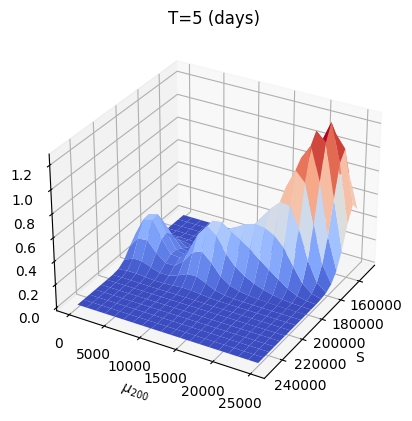

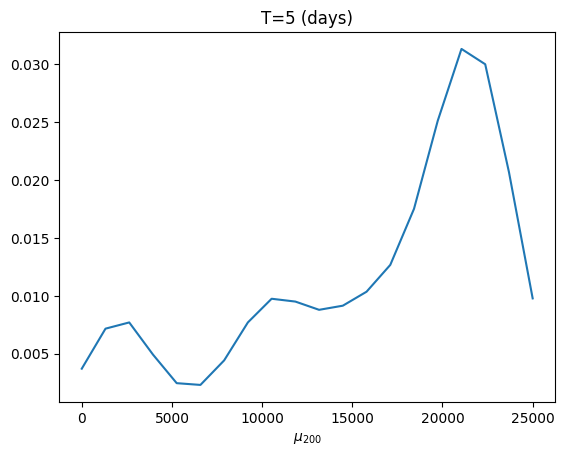

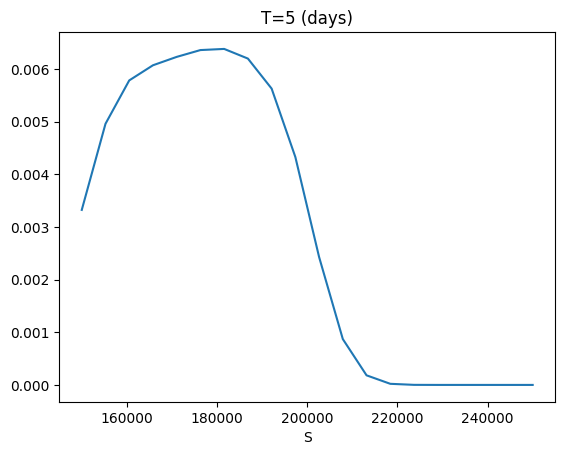

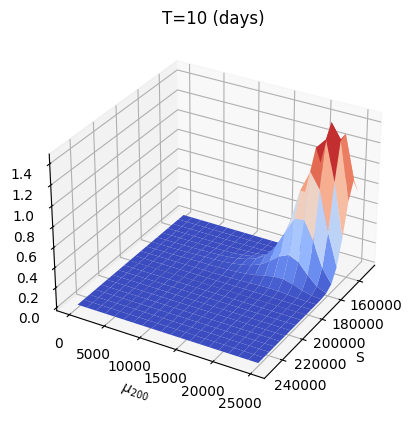

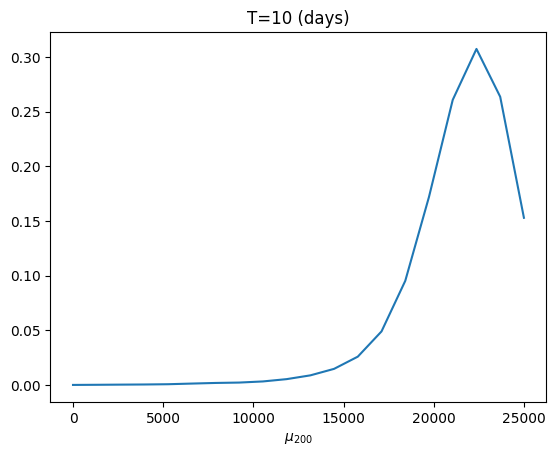

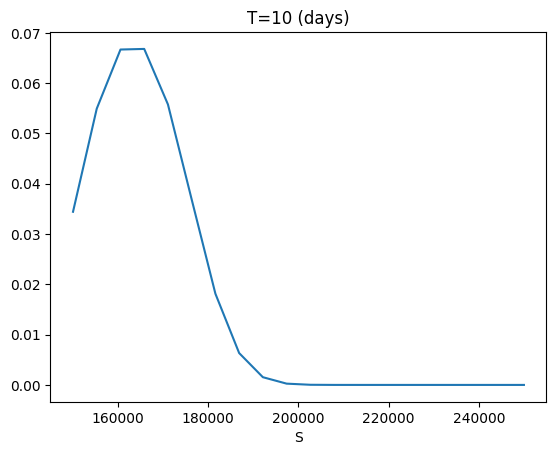

In [18]:
os.chdir('/mnt/c/Users/user/OneDrive - Indian Institute of Science/Projects/EMT PDE population model - Jules/sim_data')

file = 'Sol_s_lim_150000.00_delta_120.00_eta_S_4836.71_eta_x_1000.00_tau_1.00_r_het_p_1.00_r_het_q_1.00_ini_pop_5.00.txt'
#def draw(file, S0, x0, Lt):
X, Y=np.meshgrid(S0, x0)
US_read=np.loadtxt(file)
for i in range(len(Lt)):
    ax = plt.axes(projection='3d')
    US=US_read[i].reshape(len(x0), len(S0))
    surf = ax.plot_surface(X, Y, US,
                    #    vmin=10, 
                #    vmax=40,
                        cmap=cm.coolwarm,
                        linewidth=10, antialiased=True)
    ax.view_init(30,30)
    plt.xlabel('S')
    plt.ylabel('$\mu_{200}$')
    plt.title('T=%i (days)'%(Lt[i]/24))
    plt.show()
    h_S=(S0[-1]-S0[0])/NS
    h_x=(x0[-1]-x0[0])/Nx
    
    U=np.array([h_S*np.sum(US[i,:]) for i in range(len(x0))])
    plt.plot(x0, U)
    plt.title('T=%i (days)'%(Lt[i]/24))
    plt.xlabel('$\mu_{200}$')
    plt.show()

    U_S=np.array([h_x*np.sum(US[:,i]) for i in range(len(S0))])
    plt.plot(S0, U_S)
    plt.title('T=%i (days)'%(Lt[i]/24))
    plt.xlabel('S')
    plt.show()

In [ ]:
start=datetime.now()
L_delta_sol=[]
if __name__ == '__main__':
    with Pool(len(L_delta)) as pool:
        for result in pool.map(delta_parallel, L_delta):
            L_delta_sol.append(result)
time=datetime.now()-start


In [128]:
def twoD_to_oneD(file2D, S0, file_1D_name): 

#take a file which contains files for 2D figures and return a file which containe the ones for 1D figures

    US_read=np.loadtxt(file2D)
    h_S=(S0[-1]-S0[0])/NS
    US=[US_read[i].reshape(len(x0), len(S0)) for i in range(len(US_read))]
    U=np.array([[h_S*np.sum(US[i][j]) for j in range(len(x0))] for i in range(len(US_read)) ])
    op=open(file_1D_name, 'w+')
    np.savetxt(file_1D_name, U)

In [1]:
def copy_twoD_to_one_D(folder):
    for file in os.listdir(folder +"/2D"):
        if file[0]!=".":
            twoD_to_oneD(folder +"/2D/"+file, S0, folder+"/1D/"+file)